In [1]:
# current date, for retrieving data from proper location.
year = "2022"
month = "April"
day = "11"

In [2]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
from Analysis_Python_Files.AnalysisHelpers import fitManyGaussianImage

In [3]:
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

# Today's Work

In [4]:
reloadMyModules(13)

In [ ]:
## plot every image from scan

#     plt.imshow(rawData[2])
#     for i in range(len(rawData)):
#         plt.imshow(rawData[i])
#         plt.show()

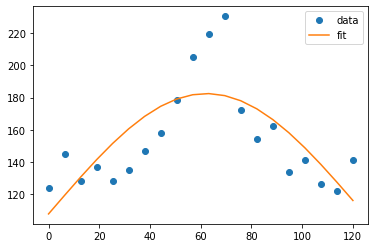

In [46]:
# 1D Gaussian Practice
ef oneD_Gauss(x, amp, x0, sigma):
    return amp * np.exp(-(x - x0)**2 / (2 * sigma**2)) 
x = np.linspace(0, 120, 20)
gdata = avrg_pic[5:25,0:20]
y =gdata[10,:]
# plt.plot(x,y)
# plt.imshow(gdata)
popt, pcov = curve_fit(oneD_Gauss, x, y)
ym = oneD_Gauss(x, popt[0], popt[1], popt[2])
plt.plot(x, y, 'o', label='data')
plt.plot(x, ym, '-', label='fit')
plt.legend()

### Fit atom signal with 2D Gaussian

Found 1 Maxima.
PSF_x = 0.4348384748310901 μm
PSF_y = 0.3647383107932969 μm


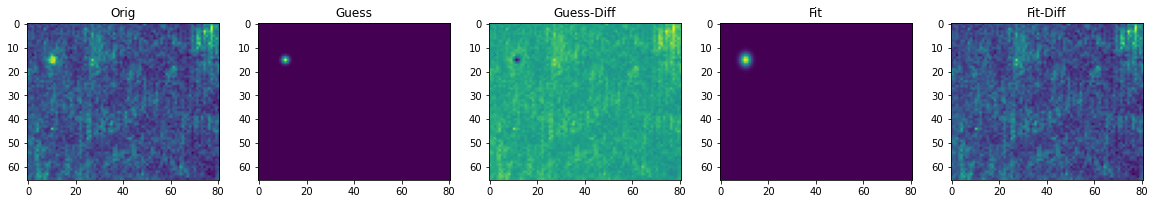

In [151]:
filename = "\\\\REGALB232EXP\\Local_Data_Repository\\2022\\April\\April 7\\Raw Data\\data_10.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
#     plt.imshow(avrg_pic)
# fitManyGaussians gives [offset,  amp_1, xo_1, yo_1, sigma_x_1, sigma_y_1, amp_2,x0_2, ...]   
initfit = fitManyGaussianImage(avrg_pic,1,threshold=120)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
print('PSF_x =',initfit[5]* pixel_size/mag,'\u03BCm')
print('PSF_y =',initfit[4]* pixel_size/mag,'\u03BCm')
# print('sigma average = ',psf,'\u03BCm')


Found 1 Maxima.
PSF_x = 0.36822007232409765 +/- 0.02 μm
PSF_y = 0.3380564033465009 +/- 0.02 μm


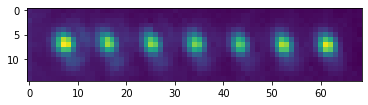

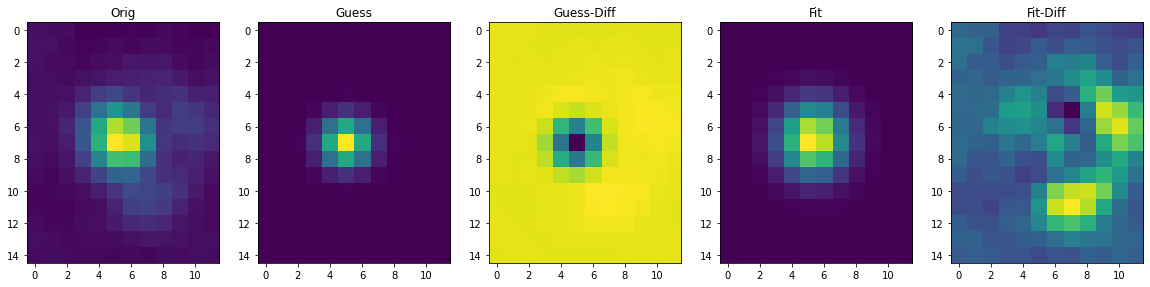

In [152]:
filename = "\\\\REGALB232EXP\\Local_Data_Repository\\2022\\April\\April 13\\Raw Data\\data_108.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)
# print(np.shape(rawData))    
atom_sig = avrg_pic[0:15,2:14]
# plt.imshow(atom_sig)
initfit = fitManyGaussianImage(atom_sig,1,threshold=10)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
print('PSF_x =',initfit[5]* pixel_size/mag,'+/- 0.02 \u03BCm')
print('PSF_y =',initfit[4]* pixel_size/mag,'+/- 0.02 \u03BCm')
# print('sigma y =',initfit[5]* pixel_size/mag,'\u03BCm')

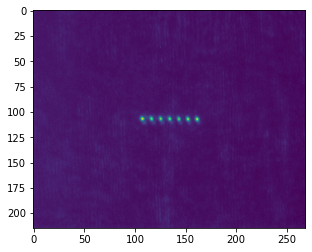

In [154]:
filename = "\\\\REGALB232EXP\\Local_Data_Repository\\2022\\April\\April 13\\Raw Data\\data_111.h5"

with exp.ExpFile() as file:
    file.open_hdf5(filename, useBase = False)
    rawData = file.get_pics()
    avrg_pic = sum(map(np.array, rawData))/len(rawData)
    plt.imshow(avrg_pic)


Found 1 Maxima.
PSF_x = 0.3708594885623983 +/- 0.02 μm
PSF_y = 0.34091707789523606 +/- 0.02 μm


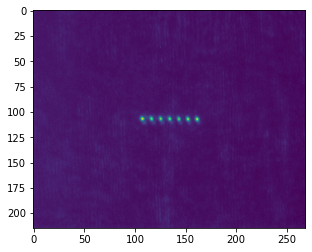

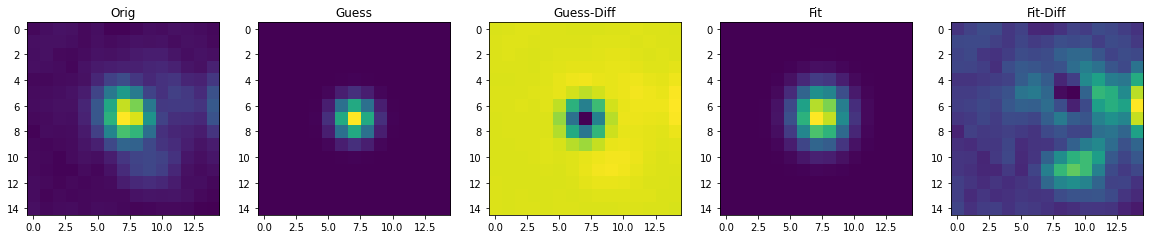

In [155]:
atom_sig = avrg_pic[100:115,100:115]
plt.imshow(avrg_pic)
initfit = fitManyGaussianImage(atom_sig,1,threshold=10)
pixel_size = 16
mag = 64
psf = (initfit[4]+initfit[5])/2 * pixel_size/mag
print('PSF_x =',initfit[5]* pixel_size/mag,'+/- 0.02 \u03BCm')
print('PSF_y =',initfit[4]* pixel_size/mag,'+/- 0.02 \u03BCm')
# print('PSF = ',psf,'\u03BCm')